In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Import the dataset
df=pd.read_csv('WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#Delete 'Id' column as it doesn't give us any information
df=df.drop('Id',axis=1)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Count null values for each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Count values for quality records
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

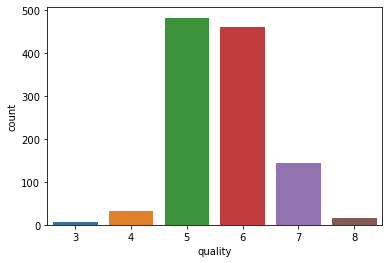

In [8]:
sns.countplot(x='quality', data=df)

In [9]:
#Independent and dependent variables
X=df.drop('quality',axis=1)
y=df['quality']

In [10]:
print('X.shape=',X.shape)
print('y.shape=',y.shape)

X.shape= (1143, 11)
y.shape= (1143,)


In [11]:
#Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [12]:
print('X_train.shape=',X_train.shape)
print('y_train.shape=',y_train.shape)

X_train.shape= (800, 11)
y_train.shape= (800,)


In [13]:
#Use Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=0)

In [14]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [15]:
y_pred=rfc.predict(X_test)

In [16]:
#Determine the accuracy score of the model
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.6297376093294461


In [17]:
from sklearn.model_selection import GridSearchCV
rfc1=RandomForestClassifier(random_state=0)

In [18]:
#GridSearchCV evaluates all combinations we define and then we find out the best parameters
param = { 
    'n_estimators': [10,20,30,40,50],
    'max_depth' : [3,4,5,6,7],
    'criterion' :['gini', 'entropy']
}

In [19]:
rfc1_grid=GridSearchCV(estimator=rfc1,param_grid=param)
rfc1_grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [20]:
#Determine the best parameters
rfc1_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 20}

In [27]:
rfc1=RandomForestClassifier(n_estimators=20, max_depth=6, criterion='entropy')

In [28]:
rfc1.fit(X_train,y_train)
y_pred1=rfc1.predict(X_test)

In [29]:
#Determine the new accuracy score
print('Accuracy:',accuracy_score(y_test,y_pred1))

Accuracy: 0.6588921282798834


In [30]:
#Features importance 
rfc1.feature_importances_

array([0.05736855, 0.11190936, 0.04661392, 0.0428023 , 0.08081931,
       0.05154318, 0.10331768, 0.0691938 , 0.05994765, 0.1682479 ,
       0.20823636])

In [31]:
imp_feat = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rfc1.feature_importances_
})
imp_feat.sort_values(by="Importance", ascending=False)

,Feature,Importance
10,alcohol,0.208236
9,sulphates,0.168248
1,volatile acidity,0.111909
6,total sulfur dioxide,0.103318
4,chlorides,0.080819
7,density,0.069194
8,pH,0.059948
0,fixed acidity,0.057369
5,free sulfur dioxide,0.051543
2,citric acid,0.046614
